In [1]:
from model import *
from data import *
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2, 'data/membrane/train', 'image', 'label', data_gen_args, save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss', verbose=1, save_best_only=True)
history = model.fit_generator(myGene, steps_per_epoch=2000, epochs=5, callbacks=[model_checkpoint])

C:\Users\xuhaozhi\Documents\Study\unet\model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\keras\legacy\layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
C:\Users\xuhaozhi\Documents\Study\unet\model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
C:\Users\xuhaozhi\Documents\Study\unet\model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `

Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
2000/2000 [==============================] - 538s 269ms/step - loss: 0.1951 - acc: 0.9140

Epoch 00001: loss improved from inf to 0.19511, saving model to unet_membrane.hdf5
Epoch 2/5
2000/2000 [==============================] - 535s 268ms/step - loss: 0.1210 - acc: 0.9469

Epoch 00002: loss improved from 0.19511 to 0.12099, saving model to unet_membrane.hdf5
Epoch 3/5
2000/2000 [==============================] - 534s 267ms/step - loss: 0.0926 - acc: 0.9596

Epoch 00003: loss improved from 0.12099 to 0.09256, saving model to unet_membrane.hdf5
Epoch 4/5
2000/2000 [==============================] - 534s 267ms/step - loss: 0.0788 - acc: 0.9656

Epoch 00004: loss improved from 0.09256 to 0.07882, saving model to unet_membrane.hdf5
Epoch 5/5
2000/2000 [==============================] - 534s 267ms/step - loss: 0.0707 - acc: 0.9691

Epoch 00005: loss improved from 0.07882 to 0.07074, saving model to une

### Train with npy file

In [2]:
from keras.callbacks import *

In [3]:
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', 
                                   monitor='loss', 
                                   verbose=1, 
                                   save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs', 
                          histogram_freq=0, 
                          batch_size=32, 
                          write_graph=True, 
                          write_grads=False, 
                          write_images=False, 
                          embeddings_freq=0, 
                          embeddings_layer_names=None, 
                          embeddings_metadata=None, 
                          embeddings_data=None, 
                          update_freq='epoch')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\GennaroDiBrino\Downloads\unet\model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [4]:
imgs_train, imgs_mask_train = geneTrainNpy("data/membrane/train/aug/", "data/membrane/train/aug/")
history = model.fit(imgs_train, 
                    imgs_mask_train, 
                    batch_size=2, 
                    nb_epoch=10, 
                    verbose=1, 
                    validation_split=0.2, 
                    shuffle=True, 
                    callbacks=[model_checkpoint])

Instructions for updating:
Use tf.cast instead.


C:\Users\GennaroDiBrino\Anaconda3\envs\tflo36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 31s 325ms/step - loss: 0.4099 - acc: 0.7792 - val_loss: 0.3259 - val_acc: 0.8481

Epoch 00001: loss improved from inf to 0.40991, saving model to unet_membrane.hdf5
Epoch 2/10
96/96 [==============================] - 22s 228ms/step - loss: 0.3330 - acc: 0.8500 - val_loss: 0.3326 - val_acc: 0.8598

Epoch 00002: loss improved from 0.40991 to 0.33299, saving model to unet_membrane.hdf5
Epoch 3/10
96/96 [==============================] - 22s 228ms/step - loss: 0.3222 - acc: 0.8639 - val_loss: 0.2990 - val_acc: 0.8827

Epoch 00003: loss improved from 0.33299 to 0.32217, saving model to unet_membrane.hdf5
Epoch 4/10
96/96 [==============================] - 22s 230ms/step - loss: 0.3113 - acc: 0.8746 - val_loss: 0.2873 - val_acc: 0.8893

Epoch 00004: loss improved from 0.32217 to 0.31127, saving model to unet_membrane.hdf5
Epoch 5/10
96/96 [==============================] - 22s 233ms/step - loss: 0

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


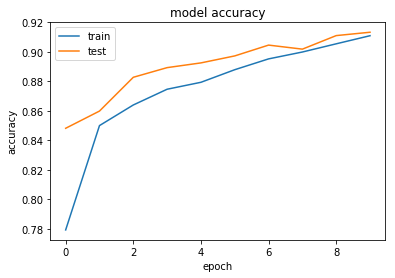

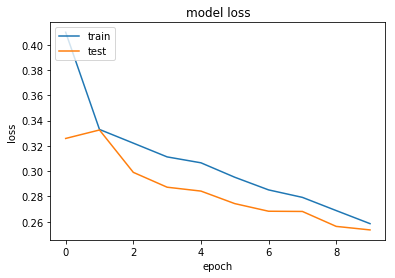

In [6]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### test your model and save predicted results

In [10]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene, 30, verbose=1)
saveResult("data/membrane/test", results) #results.astype(np.uint8)

30/30 [==============================] - 2s 75ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0